In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib
import sqlite3
import csv
import glob

<h3>Reading of all the table stored in the database. This can be optimize by just getting only the table to be used and table columns to be used.</h3>

In [11]:
def read_all_tables(connection):
    files_dict = {}
    db_tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)
    for table in db_tables['name']:
        files_dict[table] = read_table(table, connection)
    return files_dict
def read_table(table_name, connection):
     return pd.read_sql_query("SELECT * from {}".format(table_name), connection)
    
conn = sqlite3.connect('../datascience-stackexchange.db')
files_df = read_all_tables(conn)


In [12]:
def top_users(files, sourceDF):
    #top users for posting or commenting
    base_count = files[sourceDF]['UserId'].value_counts().to_frame()
    base_count = base_count.rename(columns={'UserId':'Count'})
    base_count['UserId'] = base_count.index
    #
    base_count['UserId'] = base_count['UserId'].replace('', np.nan)
    base_count.dropna(subset=['UserId'], inplace=True)
    #
    base_count = base_count.reset_index(drop=True)
    files['Users_2'] = files['Users'].rename(columns={'Id': 'UserId'})
    df_merge_col = pd.merge(base_count, files['Users_2'], on='UserId')
    
    return df_merge_col

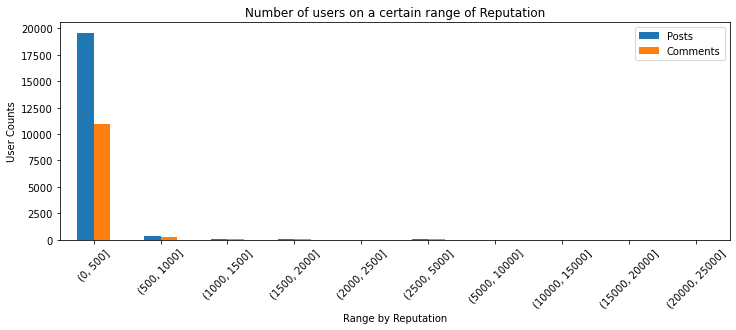

,Posts,Comments
Reputation,,
"(0, 500]",19594,10993
"(500, 1000]",325,305
"(1000, 1500]",88,84
"(1500, 2000]",53,53
"(2000, 2500]",17,16
"(2500, 5000]",37,37
"(5000, 10000]",15,15
"(10000, 15000]",5,5
"(15000, 20000]",1,1


In [15]:
top_100_user_post = top_users(files_df, 'PostHistory')
top_100_user_post = top_100_user_post.sort_values(by=['Count'], ascending = False)
top_100_user_comment = top_users(files_df, 'Comments')
top_100_user_comment = top_100_user_comment.sort_values(by=['Count'], ascending = False)

repu_range = np.concatenate((np.arange(0,3000,500), np.arange(5000,30000,5000)), axis=None)
bins = pd.cut(top_100_user_post['Reputation'], repu_range)
top_100_poster_per_reputation = top_100_user_post.groupby(bins)['Reputation'].agg(['count']).rename(columns={'count':'Posts'})


bins = pd.cut(top_100_user_comment['Reputation'], repu_range)
top_100_user_comment = top_100_user_comment.groupby(bins)['Reputation'].agg(['count']).rename(columns={'count':'Comments'})
posts_comments_by_range = pd.concat([top_100_poster_per_reputation, top_100_user_comment], axis=1)
posts_comments_by_range

posts_comments_by_range.plot(kind="bar", figsize = (12,4))
plt.ylabel("User Counts")
plt.xlabel("Range by Reputation")
plt.title("Number of users on a certain range of Reputation")
plt.xticks(rotation=45)
plt.savefig('../plots/user-count-group-by-reputation-range-all-val', dpi=150, pad_inches = 0.3, bbox_inches='tight')
plt.show()
posts_comments_by_range

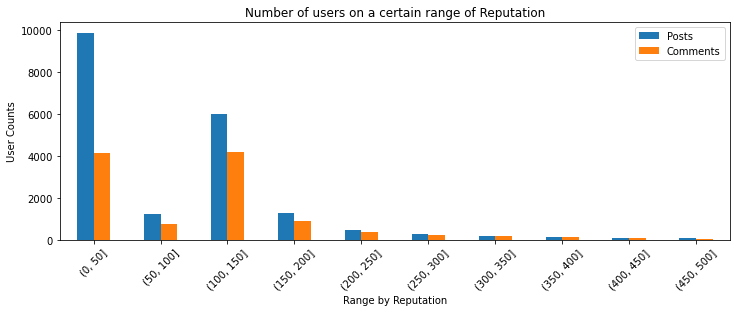

In [18]:
top_100_user_post = top_users(files_df, 'PostHistory')
top_100_user_post = top_100_user_post.sort_values(by=['Count'], ascending = False)
top_100_user_comment = top_users(files_df, 'Comments')
top_100_user_comment = top_100_user_comment.sort_values(by=['Count'], ascending = False)

repu_range = np.arange(0,501,50)

bins = pd.cut(top_100_user_post['Reputation'], repu_range)
top_100_poster_per_reputation = top_100_user_post.groupby(bins)['Reputation'].agg(['count']).rename(columns={'count':'Posts'})


bins = pd.cut(top_100_user_comment['Reputation'], repu_range)
top_100_user_comment = top_100_user_comment.groupby(bins)['Reputation'].agg(['count']).rename(columns={'count':'Comments'})
posts_comments_by_range = pd.concat([top_100_poster_per_reputation, top_100_user_comment], axis=1)

posts_comments_by_range.plot(kind="bar", figsize = (12,4))
plt.ylabel("User Counts")
plt.xlabel("Range by Reputation")
plt.title("Number of users on a certain range of Reputation")
plt.xticks(rotation=45)
plt.savefig('../plots/user-count-group-by-reputation-range-0-500', dpi=150, pad_inches = 0.3, bbox_inches='tight')
plt.show()